In [53]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [9]:
df = pd.read_csv("./train.csv")
display(df.head(3))
display("df.colums :", df.columns)
display("df.shape : ",df.shape)
display("df.info ",df.info)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


'df.colums :'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'df.shape : '

(891, 12)

'df.info '

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [13]:
#데이터 살펴보기
print(df.keys())
print()
print(df.describe())
print()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.

In [14]:
#전처리내역 : 
#train data checking : Age, Cabin, Embarked ->null
#Age는  평균 Carbin, Emvarked는 'N'값으로 반환
#Carbin 속성값 정리: 선실 번호 중 선실 등급을 나타내는 알바벳만 추출
#불필요한 컬럼 삭제 : Passenger ID, Name, Ticket
#문자열 데이터 인코딩 : Sex, Cabin, Embarked
#번주형 취급 : Pclass, Survived

In [18]:
df['Age'].value_counts()
df['Cabin'].value_counts()
df['Embarked'].value_counts()
df['Sex'].value_counts()
df['Pclass'].value_counts()
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [30]:
print(df['Age'].isnull().sum())
print(df.Age.isnull().sum())
df['Age'].fillna(df['Age'].mean(),inplace=True)
print(df.Age.value_counts())
help(df.fillna)

0
0
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64
Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes

In [42]:
print(df['Embarked'].value_counts())
df['Embarked'].fillna('N',inplace=True)
print(df['Embarked'].isnull().sum())
print((df['Embarked']=='nan').sum())

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64
0
0


In [54]:
df.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

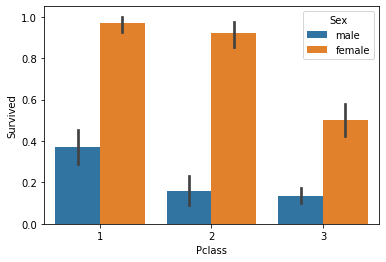

In [56]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)

In [57]:
df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [59]:
def get_category(age):
    cat =''
    if age <= 5: cat='Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 19: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

df['Age_cat']=df['Age'].apply(get_category)
df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [63]:
plt.figure(figsize=(12,6))
sns.catplot(x='Age_cat',y='Survived',hue='Sex',data=df,kind='boxen')
palette = sns.color_palette(['red','blue'])
print(palette)

TypeError: 'module' object is not callable